In [4]:
# -----------------------------------------------------------
# 📚 PRACTICAL: Exploratory Data Analysis (EDA) using Numpy, Pandas, Matplotlib, and Seaborn
# -----------------------------------------------------------

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
# -----------------------------------------------------------
# 🔹 STEP 1: Generate Synthetic Real-World-Like Data
# -----------------------------------------------------------

# Simulate customer transaction data
np.random.seed(42)
n = 200
data = {
    'Customer_ID': np.arange(1001, 1001 + n),
    'Age': np.random.randint(18, 70, size=n),
    'Gender': np.random.choice(['Male', 'Female'], size=n),
    'Annual_Income_k$': np.random.normal(70, 20, size=n).round(2),
    'Spending_Score': np.random.randint(1, 100, size=n),
    'Membership': np.random.choice(['Basic', 'Silver', 'Gold'], size=n, p=[0.4, 0.4, 0.2])
}
df = pd.DataFrame(data)

In [6]:
# -----------------------------------------------------------
# 🔹 STEP 2: Understand the Data
# -----------------------------------------------------------

print("\n🔍 First 5 rows:")
print(df.head())
print("\n📋 Data Info:")
print(df.info())
print("\n📊 Descriptive Stats:")
print(df.describe())
print("\n📈 Value Counts:")
print(df['Membership'].value_counts())


🔍 First 5 rows:
   Customer_ID  Age  Gender  Annual_Income_k$  Spending_Score Membership
0         1001   56  Female             67.18               8     Silver
1         1002   69  Female             87.44              58       Gold
2         1003   46    Male             96.01              60      Basic
3         1004   32    Male             43.13              50     Silver
4         1005   60  Female             87.00              28     Silver

📋 Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Customer_ID       200 non-null    int64  
 1   Age               200 non-null    int64  
 2   Gender            200 non-null    object 
 3   Annual_Income_k$  200 non-null    float64
 4   Spending_Score    200 non-null    int64  
 5   Membership        200 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usag

In [7]:
# -----------------------------------------------------------
# 🔹 STEP 3: Data Cleaning Example
# -----------------------------------------------------------

# Introduce missing values for demo
df.loc[df.sample(frac=0.05).index, 'Annual_Income_k$'] = np.nan
print("\n❌ Missing values per column:")
print(df.isnull().sum())

# Fill missing with mean
df['Annual_Income_k$'].fillna(df['Annual_Income_k$'].mean(), inplace=True)


❌ Missing values per column:
Customer_ID          0
Age                  0
Gender               0
Annual_Income_k$    10
Spending_Score       0
Membership           0
dtype: int64


<ipython-input-7-1484941736>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Annual_Income_k$'].fillna(df['Annual_Income_k$'].mean(), inplace=True)


In [8]:
# -----------------------------------------------------------
# 🔹 STEP 4: Data Manipulation with Pandas
# -----------------------------------------------------------

# Create new column - income group
df['Income_Group'] = pd.cut(df['Annual_Income_k$'], bins=[0, 50, 90, 150], labels=['Low', 'Medium', 'High'])

# Group by membership and income group
group_summary = df.groupby(['Membership', 'Income_Group'])['Spending_Score'].mean().unstack()
print("\n📊 Mean Spending Score by Membership and Income Group:")
print(group_summary)




📊 Mean Spending Score by Membership and Income Group:
Income_Group        Low     Medium       High
Membership                                   
Basic         62.200000  46.000000  45.818182
Gold          41.200000  62.227273  60.142857
Silver        47.047619  49.862069  55.076923


<ipython-input-8-400962886>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_summary = df.groupby(['Membership', 'Income_Group'])['Spending_Score'].mean().unstack()


In [9]:
# Additional insight: spending distribution by age group
df['Age_Group'] = pd.cut(df['Age'], bins=[15, 25, 40, 60, 80], labels=['Teen/Young', 'Adult', 'Middle-aged', 'Senior'])
age_membership_spend = df.groupby(['Age_Group', 'Membership'])['Spending_Score'].mean().unstack()
print("\n📊 Avg Spending Score by Age Group and Membership:")
print(age_membership_spend)


📊 Avg Spending Score by Age Group and Membership:
Membership       Basic       Gold     Silver
Age_Group                                   
Teen/Young   46.000000  57.285714  53.700000
Adult        48.391304  65.000000  47.380952
Middle-aged  51.407407  64.142857  51.904762
Senior       51.000000  43.857143  46.526316


<ipython-input-9-519464080>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_membership_spend = df.groupby(['Age_Group', 'Membership'])['Spending_Score'].mean().unstack()


In [10]:
# -----------------------------------------------------------
# 🔹 STEP 5: Statistical Analysis with Pandas
# -----------------------------------------------------------

# Summary statistics by gender
print("\n📊 Summary Stats by Gender:")
print(df.groupby('Gender')[['Age', 'Annual_Income_k$', 'Spending_Score']].agg(['mean', 'median', 'std', 'min', 'max']))





📊 Summary Stats by Gender:
              Age                           Annual_Income_k$             \
             mean median        std min max             mean     median   
Gender                                                                    
Female  43.972727   44.0  15.480357  18  69        68.012042  68.264105   
Male    42.755556   43.0  14.313748  18  68        68.572182  68.264105   

                                 Spending_Score                            
              std    min     max           mean median        std min max  
Gender                                                                     
Female  21.606536   2.72  112.86      50.327273   51.5  29.064973   1  99  
Male    19.974107  20.87  110.01      52.233333   52.5  29.558949   1  99  


In [11]:
# Correlation matrix
print("\n📉 Correlation Matrix:")
print(df[['Age', 'Annual_Income_k$', 'Spending_Score']].corr())

# Value counts for categorical features
print("\n🔢 Membership Distribution:")
print(df['Membership'].value_counts(normalize=True) * 100)
print("\n🔢 Income Group Distribution:")
print(df['Income_Group'].value_counts(normalize=True) * 100)

# Crosstab for Membership vs Income Group
print("\n🔄 Crosstab of Membership vs Income Group:")
print(pd.crosstab(df['Membership'], df['Income_Group'], normalize='index') * 100)


📉 Correlation Matrix:
                       Age  Annual_Income_k$  Spending_Score
Age               1.000000         -0.035475        0.026662
Annual_Income_k$ -0.035475          1.000000       -0.034592
Spending_Score    0.026662         -0.034592        1.000000

🔢 Membership Distribution:
Membership
Silver    46.0
Basic     37.0
Gold      17.0
Name: proportion, dtype: float64

🔢 Income Group Distribution:
Income_Group
Medium    64.0
Low       20.5
High      15.5
Name: proportion, dtype: float64

🔄 Crosstab of Membership vs Income Group:
Income_Group        Low     Medium       High
Membership                                   
Basic         20.270270  64.864865  14.864865
Gold          14.705882  64.705882  20.588235
Silver        22.826087  63.043478  14.130435


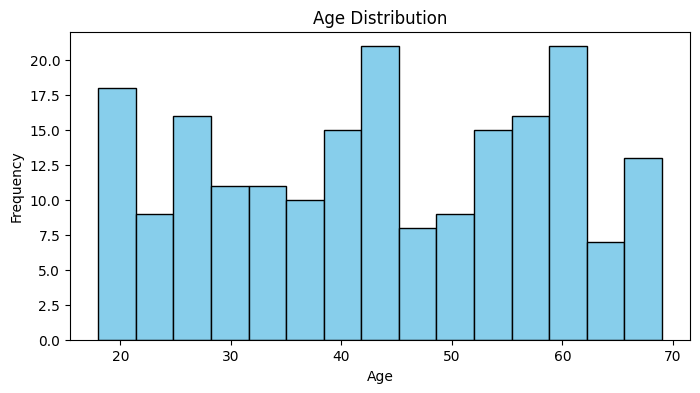

<ipython-input-12-3090849676>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Gender', y='Annual_Income_k$', palette='Set2')


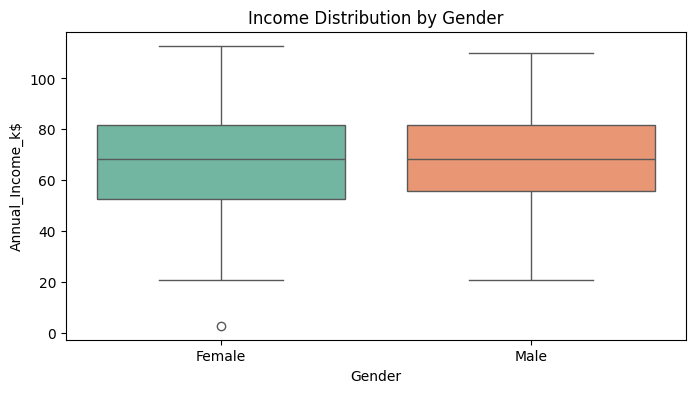

<ipython-input-12-3090849676>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Membership', y='Spending_Score', palette='Set1')


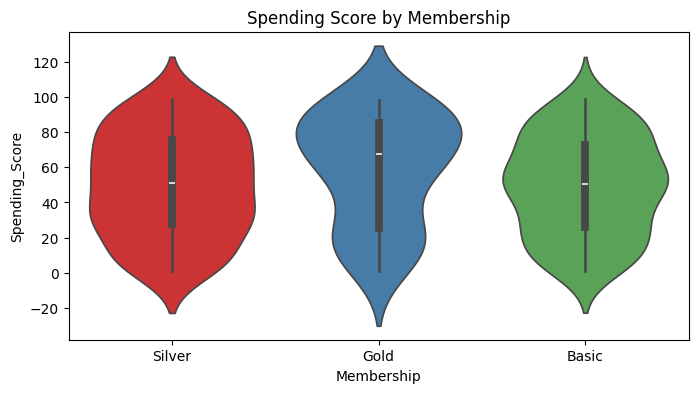

In [12]:
# -----------------------------------------------------------
# 🔹 STEP 6: Visualization Using Matplotlib and Seaborn
# -----------------------------------------------------------

# Histogram of Age
plt.figure(figsize=(8, 4))
plt.hist(df['Age'], bins=15, color='skyblue', edgecolor='black')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()






In [ ]:
# Boxplot of Income by Gender
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='Gender', y='Annual_Income_k$', palette='Set2')
plt.title("Income Distribution by Gender")
plt.show()



In [ ]:
# Violin plot of spending by membership
plt.figure(figsize=(8, 4))
sns.violinplot(data=df, x='Membership', y='Spending_Score', palette='Set1')
plt.title("Spending Score by Membership")
plt.show()

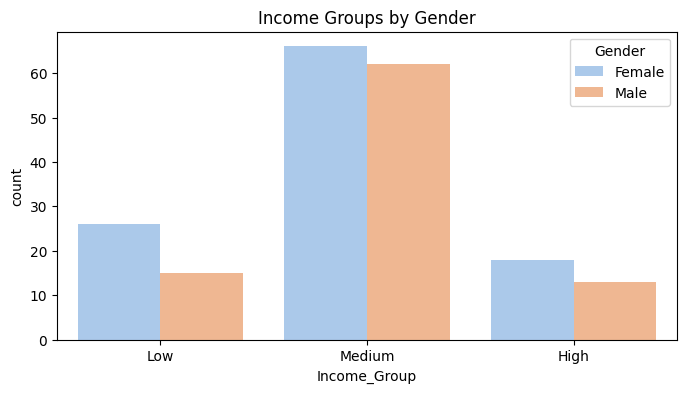

In [15]:
# Countplot of income groups
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Income_Group', hue='Gender', palette='pastel')
plt.title("Income Groups by Gender")
plt.show()



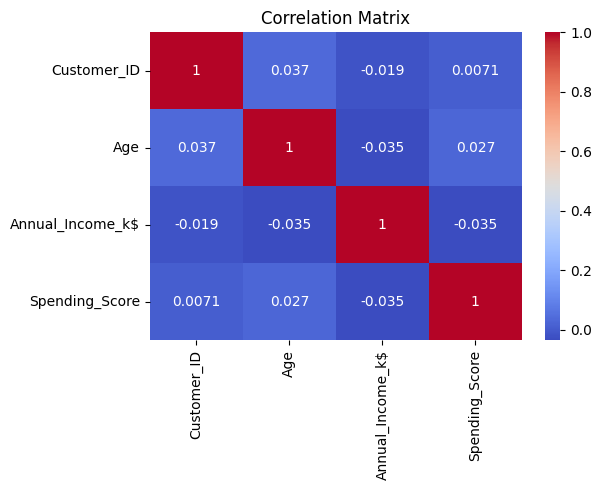

In [16]:
# Heatmap of correlation
plt.figure(figsize=(6, 4))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()



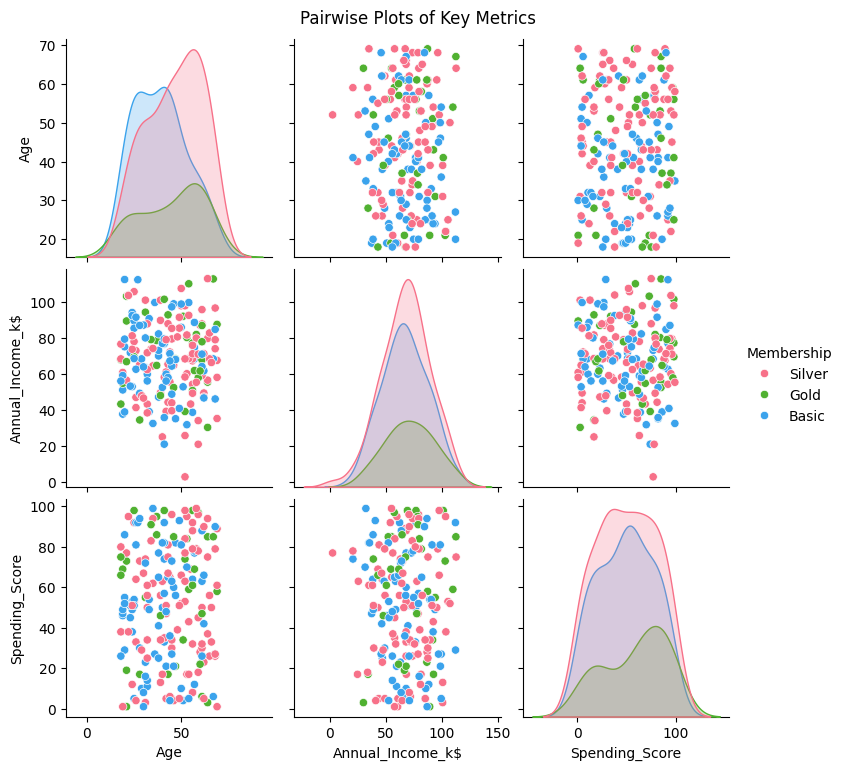

In [17]:
# Additional: Pairplot of numeric features colored by membership
sns.pairplot(df[['Age', 'Annual_Income_k$', 'Spending_Score', 'Membership']], hue='Membership', palette='husl')
plt.suptitle("Pairwise Plots of Key Metrics", y=1.02)
plt.show()

In [14]:
# -----------------------------------------------------------
# 🔹 STEP 7: Summary of Why We Use Each Library
# -----------------------------------------------------------

print("""
🔍 SUMMARY:
- NumPy: Efficient numerical operations (used for generating random data).
- Pandas: Data handling, cleaning, transformation, statistical analysis (e.g., groupby, fillna, describe, crosstab).
- Matplotlib: Low-level plotting (e.g., histograms, general layout control).
- Seaborn: High-level statistical plotting (e.g., violinplot, boxplot, heatmap, pairplot).

This practical demonstrated real-world style EDA workflow, including:
✔ Missing value handling
✔ Feature engineering (grouping)
✔ Grouped analysis
✔ Summary stats and correlations
✔ Visual exploration across demographics and income levels
""")


🔍 SUMMARY:
- NumPy: Efficient numerical operations (used for generating random data).
- Pandas: Data handling, cleaning, transformation, statistical analysis (e.g., groupby, fillna, describe, crosstab).
- Matplotlib: Low-level plotting (e.g., histograms, general layout control).
- Seaborn: High-level statistical plotting (e.g., violinplot, boxplot, heatmap, pairplot).

This practical demonstrated real-world style EDA workflow, including:
✔ Missing value handling
✔ Feature engineering (grouping)
✔ Grouped analysis
✔ Summary stats and correlations
✔ Visual exploration across demographics and income levels

